The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Positioning nodes


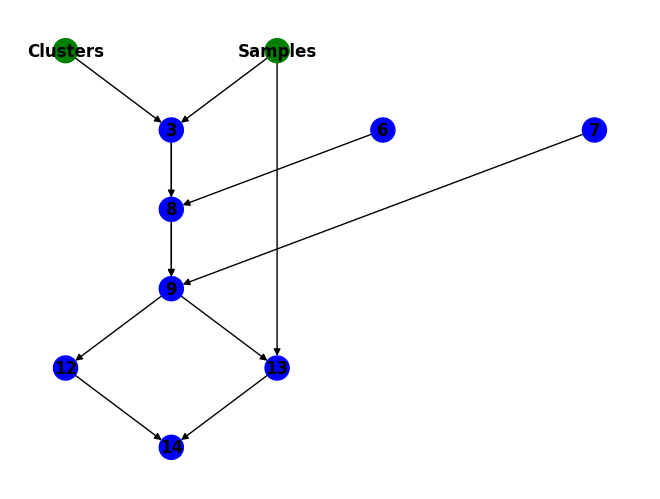

In [10]:
%load_ext autoreload
%autoreload 2
import tensorcraft as tc

from tensorcraft.compiler.compiler import ProgramTransformer
from tensorcraft.viz.program_graph import draw_program_graph
code = """
# Distance computation
Dist[j,k] = (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] = (Dist[j,k] < Min[j]) * (Dist[j,k] - Min[j])
Labels[j] = (Dist[j,k] == Min[j]) * (k - Labels[j])

# Cluster update
Count[l] = (Labels[j] == l)
Update[l,k] = Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
tree = tc.compile(code)

kmeans_kernel = ProgramTransformer(code).transform(tree)
draw_program_graph(kmeans_kernel)

Positioning nodes


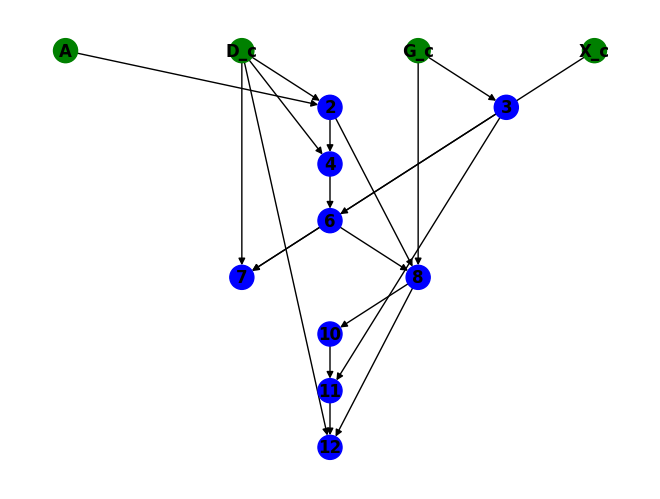

In [11]:
code = """
W_c[i] = A[i,j] * D_c[j]
Gamma_c = G_c[i] * G_c[i]
Theta_c = D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + Alpha_c * D_c[i]
G_n[i] = G_c[i] + Alpha_c * W_c[i]

Gamma_n = G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n = Beta_n * D_c[i] - G_n[i]
"""
tree = tc.compile(code)

conjugate_gradient_kernel: tc.compiler.Program = ProgramTransformer(code).transform(tree)
draw_program_graph(conjugate_gradient_kernel)


In [3]:
for n in conjugate_gradient_kernel.graph:
    print(n)
pos

X_c
A
G_c
D_c
2
3
4
6
7
8
10
11
12


NameError: name 'pos' is not defined